In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg

%load_ext autoreload
%autoreload 2

In [2]:
results_dir = os.path.join(
    cfg.repo_root, '08_cell_line_prediction', 'results', 'tcga_ccle_nn_lr_range'
)

num_genes = 8000
plot_gene = 'KRAS'

In [3]:
lc_dfs = {}

for lc_file in glob.glob(
    os.path.join(results_dir,
                 plot_gene,
                 f'{plot_gene}_signal_mad_s42_n{num_genes}_lr*_classify_learning_curves.tsv.gz')
):
    learning_rate = (
        os.path.basename(lc_file).split('_')[5].replace('lr', '')
    )
    lc_df = pd.read_csv(lc_file, sep='\t', index_col=0).reset_index(drop=True)
    lc_df['learning_rate'] = learning_rate
    lc_dfs[learning_rate] = lc_df

print(list(lc_dfs.keys()))
lc_dfs[list(lc_dfs.keys())[0]].head()

['0.0005', '0.0001', '0.1', '0.01', '0.005', '0.001']


,epoch,fold,dataset,metric,value,learning_rate
0,1,0,train,aupr,0.594870,0.0005
1,2,0,train,aupr,0.813569,0.0005
2,3,0,train,aupr,0.903578,0.0005
3,4,0,train,aupr,0.943436,0.0005
4,5,0,train,aupr,0.973287,0.0005


['0.0001', '0.0005', '0.001', '0.005', '0.01', '0.1']


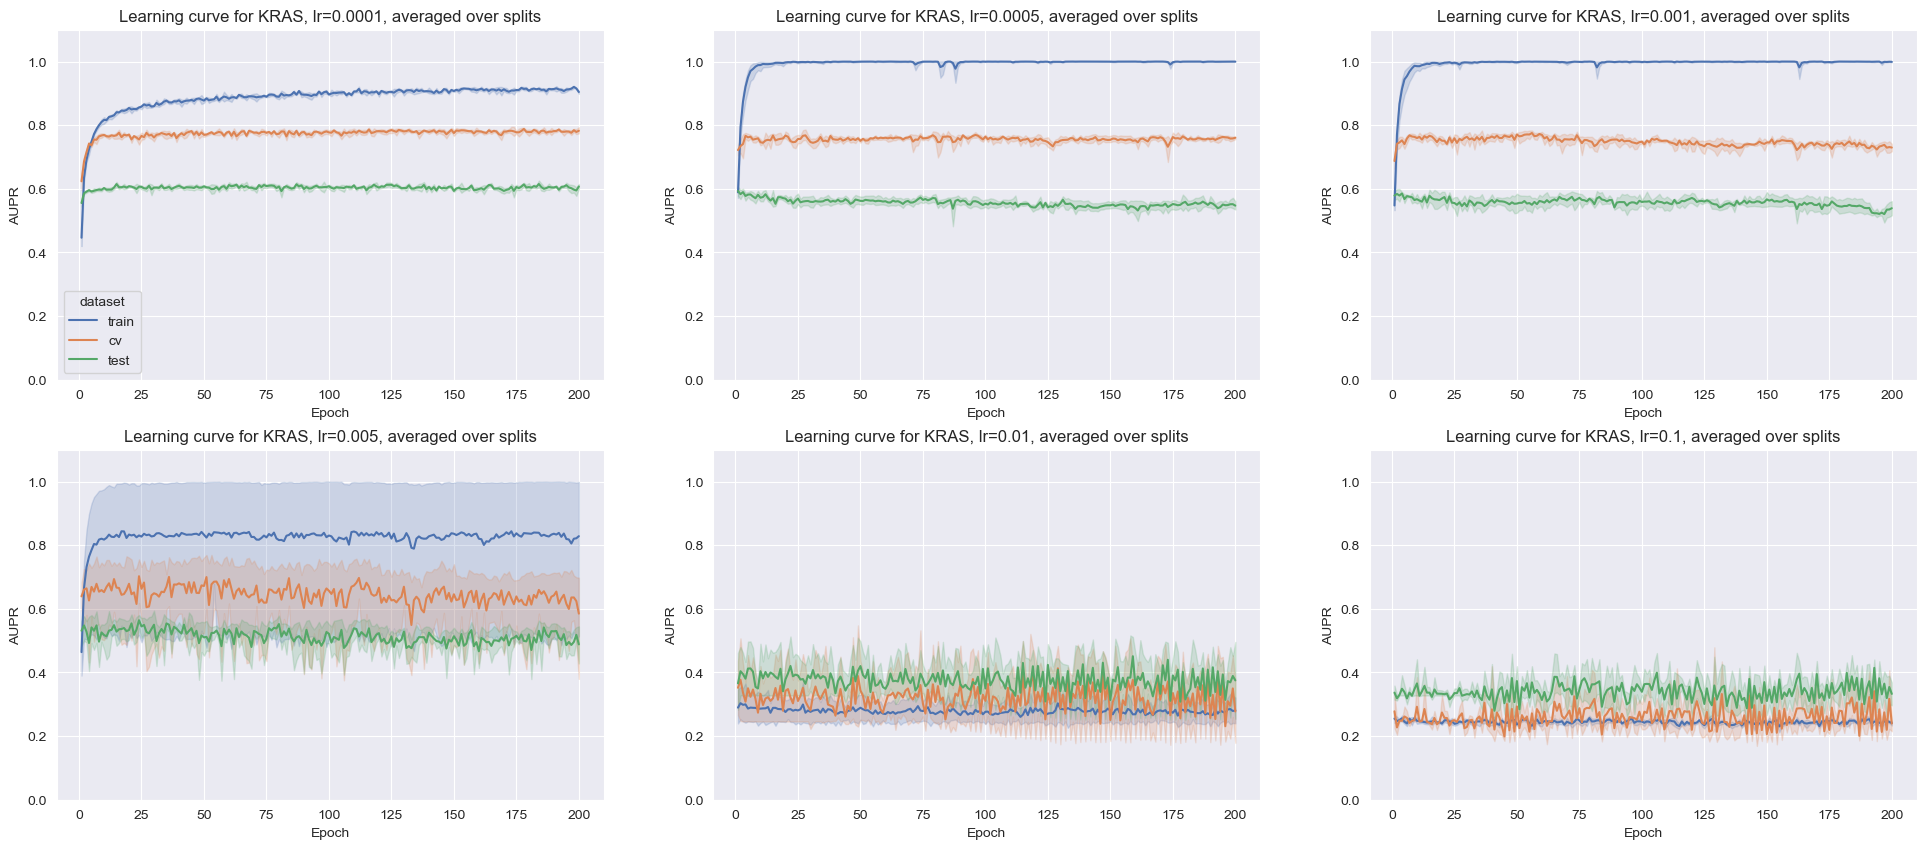

In [4]:
sns.set_style('whitegrid')
sns.set({'figure.figsize': (24, 10)})

learning_rates = sorted(list(lc_dfs.keys()))
print(learning_rates)

fig, axarr = plt.subplots(len(learning_rates) // 3, 3)

for ix, lr in enumerate(learning_rates):
    ax = axarr[ix // 3, ix % 3]
    if ix == 0:
        sns.lineplot(data=lc_dfs[lr], x='epoch', y='value', hue='dataset', ax=ax)
    else:
        sns.lineplot(data=lc_dfs[lr], x='epoch', y='value', hue='dataset', legend=False, ax=ax)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('AUPR')
    ax.set_ylim(0, 1.1)
    ax.set_title(f'Learning curve for {plot_gene}, lr={lr}, averaged over splits')

['0.0001', '0.0005', '0.001', '0.005', '0.01', '0.1']


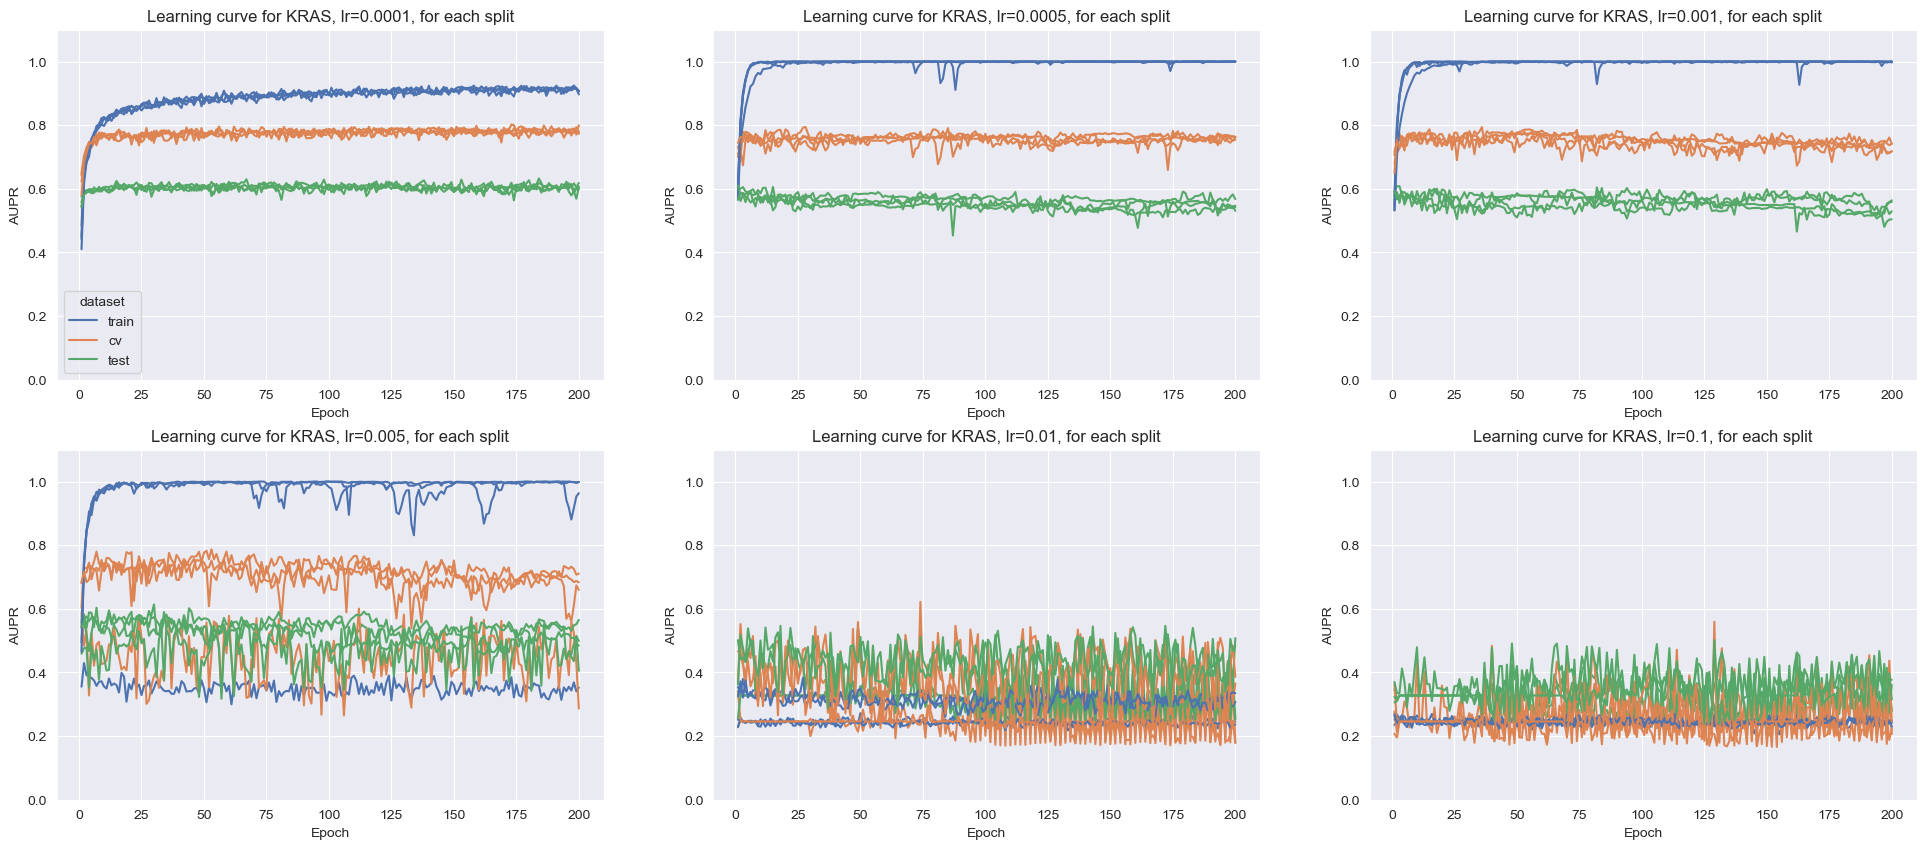

In [5]:
sns.set_style('whitegrid')
sns.set({'figure.figsize': (24, 10)})

learning_rates = sorted(list(lc_dfs.keys()))
print(learning_rates)

fig, axarr = plt.subplots(len(learning_rates) // 3, 3)

for lr_ix, lr in enumerate(learning_rates):
    ax = axarr[lr_ix // 3, lr_ix % 3]
    lc_df = lc_dfs[lr]
    for fold_ix, fold in enumerate(lc_df.fold.unique()):
        if lr_ix == 0 and fold_ix == 0:
            sns.lineplot(data=lc_df[lc_df.fold == fold],
                         x='epoch', y='value', hue='dataset', ax=ax)
        else:
            sns.lineplot(data=lc_df[lc_df.fold == fold],
                         x='epoch', y='value', hue='dataset',
                         legend=False, ax=ax)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('AUPR')
    ax.set_ylim(0, 1.1)
    ax.set_title(f'Learning curve for {plot_gene}, lr={lr}, for each split')